In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
def concatcsv(inputfile,output):
    tempdata = pd.read_csv(inputfile)
    tempdata['city'] = inputfile.split('_')[0]
    tempdata['weekdays'] = inputfile.split('_')[1].split('.')[0] == 'weekdays'
    output = pd.concat([output,tempdata],axis=0)
    return output

In [3]:
data = pd.read_csv('amsterdam_weekdays.csv',header='infer')
data['city']='amsterdam'
data['weekdays']=1
data.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekdays
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1


In [4]:
data = concatcsv('amsterdam_weekends.csv',data)
data = concatcsv('athens_weekends.csv',data)
data = concatcsv('athens_weekdays.csv',data)
data = concatcsv('barcelona_weekends.csv',data)
data = concatcsv('barcelona_weekdays.csv',data)
data = concatcsv('berlin_weekends.csv',data)
data = concatcsv('berlin_weekdays.csv',data)
data = concatcsv('budapest_weekends.csv',data)
data = concatcsv('budapest_weekdays.csv',data)
data = concatcsv('lisbon_weekends.csv',data)
data = concatcsv('lisbon_weekdays.csv',data)
data = concatcsv('london_weekends.csv',data)
data = concatcsv('london_weekdays.csv',data)
data = concatcsv('paris_weekends.csv',data)
data = concatcsv('paris_weekdays.csv',data)
data = concatcsv('rome_weekends.csv',data)
data = concatcsv('rome_weekdays.csv',data)
data = concatcsv('vienna_weekends.csv',data)
data = concatcsv('vienna_weekdays.csv',data)

In [5]:
data['weekdays'].value_counts()

0    26207
1    25500
Name: weekdays, dtype: int64

In [6]:
data['city'].value_counts()


london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

In [7]:
data.drop(columns=data.columns[0],inplace=True)

In [8]:
print(data.dtypes)

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
weekdays                        int64
dtype: object


In [9]:
# print(data.dtypes)
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,0.493163
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,0.499958
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,0.000000
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,0.000000
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,1.000000
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,1.000000


In [10]:
print(data.isnull().sum())

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
weekdays                      0
dtype: int64


In [11]:
data.duplicated().sum()

0

<Axes: xlabel='realSum'>

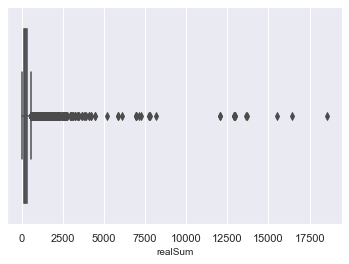

In [12]:
sb.boxplot(x=data['realSum'],orient = 'h')

<Axes: xlabel='realSum', ylabel='Count'>

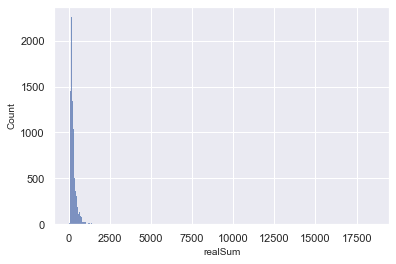

In [13]:
sb.histplot(data=data['realSum'])

In [14]:
data['realSum'].skew()

21.419956563350983

In [15]:
def outlier(df, col):
    sorted(df[col])
    Q1,Q3 = np.percentile(df[col] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [16]:
lower , upper = outlier(data, 'realSum')
print("lower: ",lower)
print("upper: ",upper)

lower:  -107.660995498034
upper:  576.1074557199221


In [17]:
data['realSum'].quantile(0.9)

500.88004895552956

In [18]:
tempdf = data[data['realSum']>upper]

In [19]:
data['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

In [20]:
tempdf['city'].value_counts()

london       1332
paris         979
amsterdam     740
barcelona     231
berlin        104
rome           87
lisbon         67
vienna         54
budapest       42
athens         26
Name: city, dtype: int64

In [21]:
data['room_type'].value_counts()

Entire home/apt    32648
Private room       18693
Shared room          366
Name: room_type, dtype: int64

In [22]:
tempdf['room_type'].value_counts()

Entire home/apt    3312
Private room        348
Shared room           2
Name: room_type, dtype: int64

In [23]:
outlierindex = data[data['realSum']>upper].index
data.drop(index=outlierindex, inplace=True)

<Axes: xlabel='realSum'>

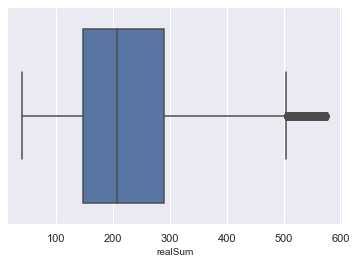

In [24]:
sb.boxplot(x=data['realSum'],orient = 'h')

<Axes: xlabel='realSum', ylabel='Count'>

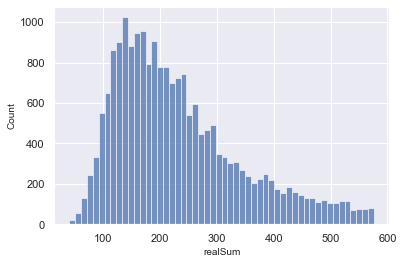

In [25]:
sb.histplot(data=data['realSum'])

In [26]:
data['realSum'].skew()

0.9588883821807196

In [27]:
data['room_type'].value_counts()

Entire home/apt    12164
Private room        7958
Shared room          138
Name: room_type, dtype: int64

In [28]:
data['room_shared'].value_counts()

False    20122
True       138
Name: room_shared, dtype: int64

In [29]:
data['room_private'].value_counts()

False    12302
True      7958
Name: room_private, dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20260 entries, 0 to 1735
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     20260 non-null  float64
 1   room_type                   20260 non-null  object 
 2   room_shared                 20260 non-null  bool   
 3   room_private                20260 non-null  bool   
 4   person_capacity             20260 non-null  float64
 5   host_is_superhost           20260 non-null  bool   
 6   multi                       20260 non-null  int64  
 7   biz                         20260 non-null  int64  
 8   cleanliness_rating          20260 non-null  float64
 9   guest_satisfaction_overall  20260 non-null  float64
 10  bedrooms                    20260 non-null  int64  
 11  dist                        20260 non-null  float64
 12  metro_dist                  20260 non-null  float64
 13  attr_index                  2026

In [31]:
data['realSum'].describe()

count    20260.000000
mean       232.416300
std        112.650525
min         40.184236
25%        147.165655
50%        206.260730
75%        289.988005
max        575.977798
Name: realSum, dtype: float64

In [36]:
realSum = pd.DataFrame(data['realSum'])
person_capacity = pd.DataFrame(data['person_capacity'])
metro_dist = pd.DataFrame(data['metro_dist'])
dist = pd.DataFrame(data['dist'])
lng = pd.DataFrame(data['lng'])
lat = pd.DataFrame(data['lat'])
attr_index = pd.DataFrame(data['attr_index'])
attr_index_norm = pd.DataFrame(data['attr_index_norm'])
rest_index = pd.DataFrame(data['rest_index'])
rest_index_norm = pd.DataFrame(data['rest_index_norm'])

C:\Users\Kendrea\Anaconda\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<Axes: >

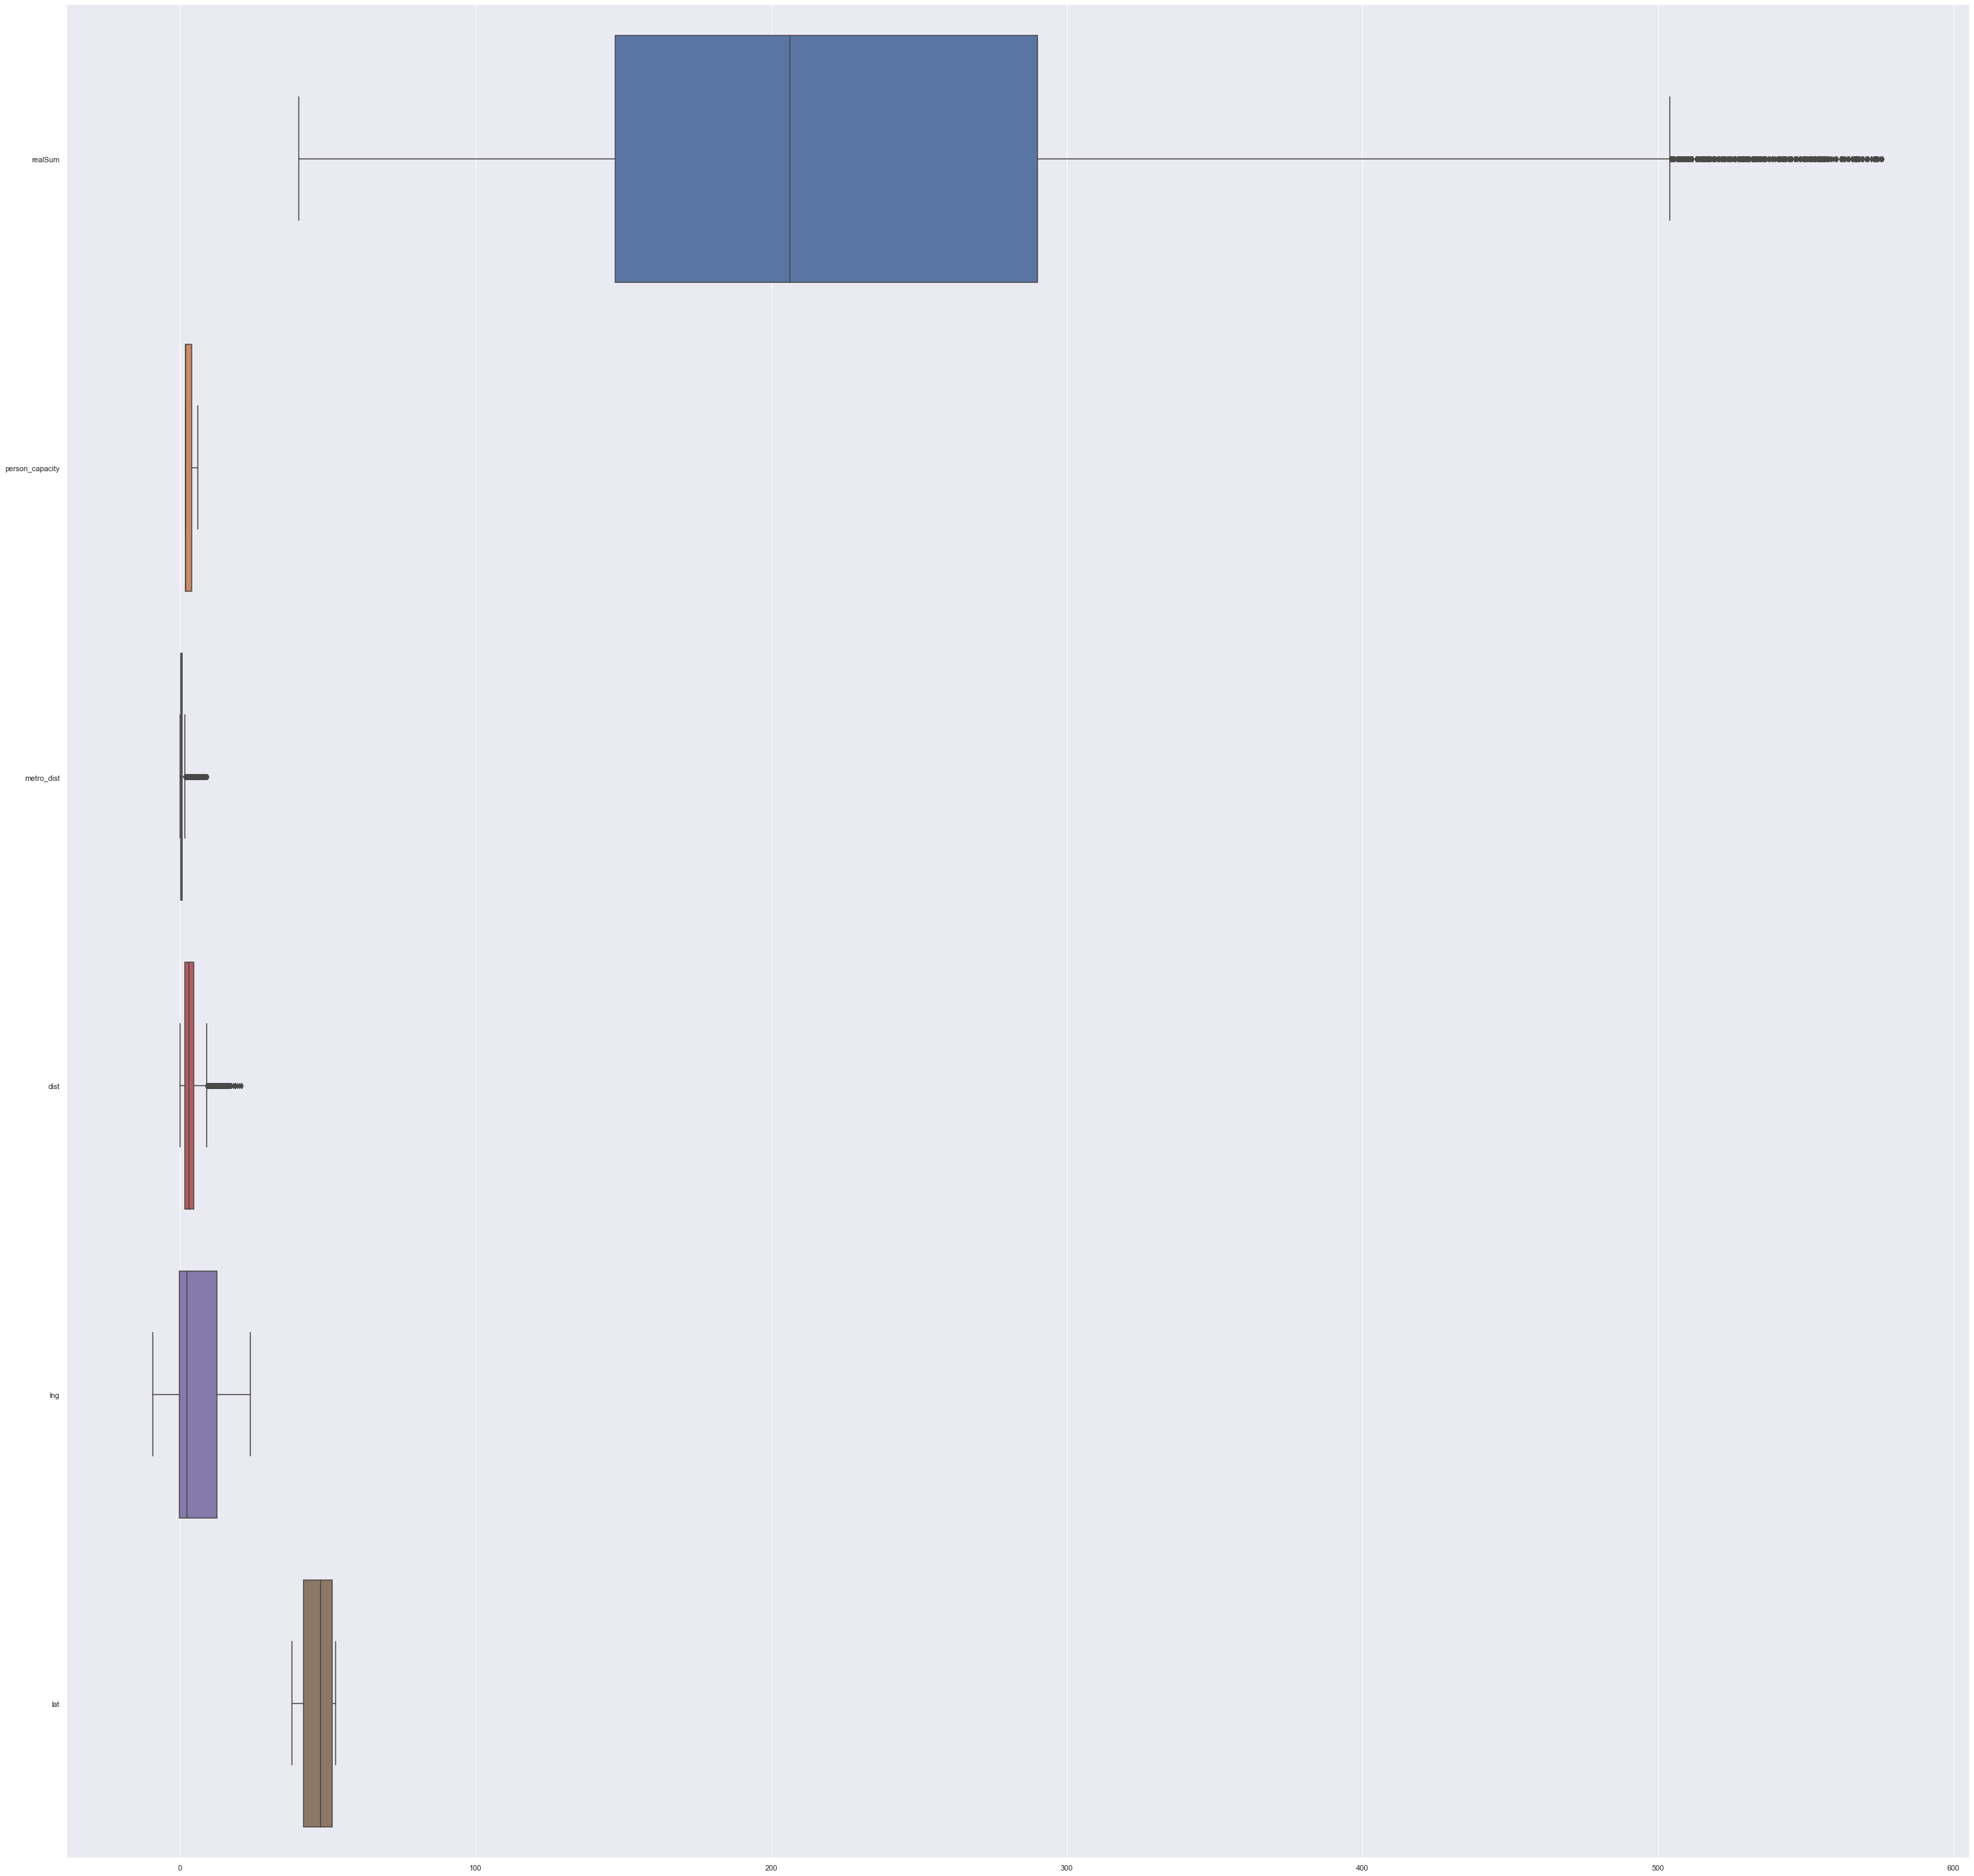

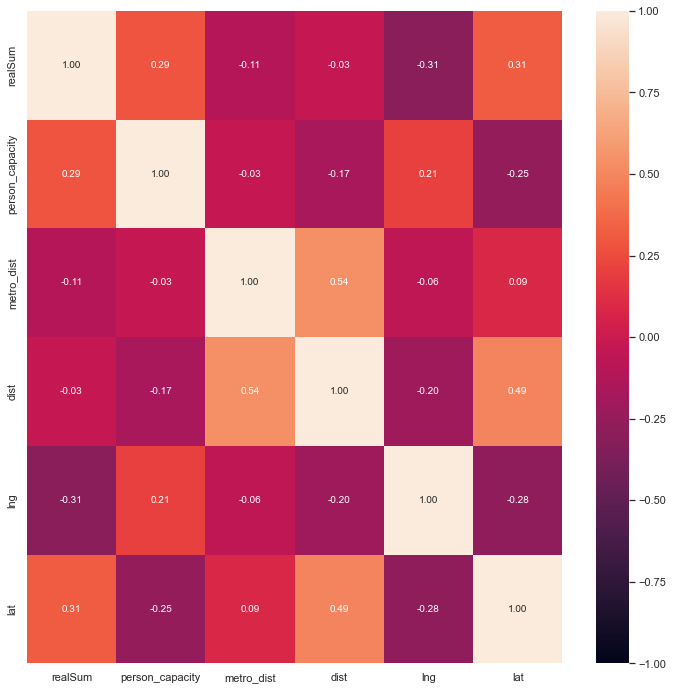

In [53]:
# Extract only the numeric data variables
numDF = pd.DataFrame(data[["realSum", "person_capacity", "metro_dist", "dist", "lng", "lat"]])

# Summary Statistics for all Variables
numDF.describe()

f = plt.figure(figsize=(50, 50))
sb.boxplot(data = numDF, orient = "h")

numDF.corr()

f = plt.figure(figsize=(12, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")